## Check power in Rayleigh-Sommerfeld propagation

In this example, we verify that the energy of the beam (here we use a Gauss beam) is constant for propagation. We use the XYZ module and Rayleigh-Sommerfeld algorithm.

In [1]:
from diffractio import degrees, eps, mm, no_date, np, um, plt
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

number of processors: 8


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize']=(6,4)
rcParams['figure.dpi']=125

In [3]:
x0 = np.linspace(-100 * um, 100 * um, 256)
y0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(500 * um, 10*mm, 32)
wavelength = .6328 * um

In [4]:
t1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
t1.gauss_beam(r0=(0,0), w0=40*um, z0=0.0, A=1, theta=0.0, phi=0.0)

uxyz = Scalar_mask_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)

uxyz.incident_field(u0=t1)

uxyz.RS(verbose=True, num_processors=4)

time in RS= 3.3599321842193604. num proc= 4


3.3599321842193604

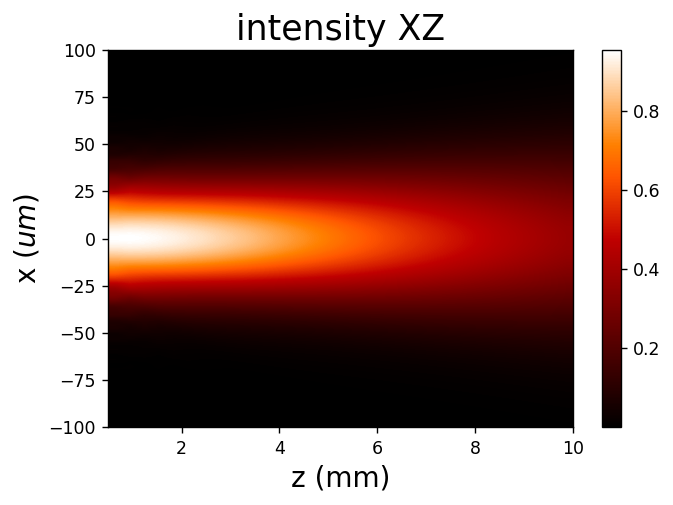

In [5]:
uxyz.draw_XZ(y0=0)

In [6]:
intensity=np.abs(uxyz.u)**2

In [7]:
total_energy=intensity.mean(axis=0).mean(axis=0)

(0.0, 0.06423850584714794)

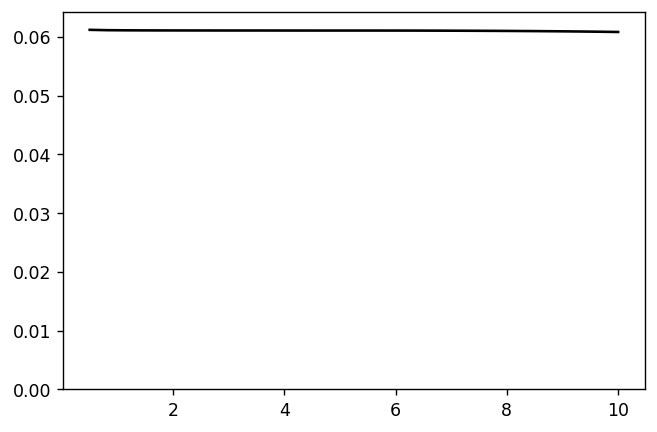

In [8]:
plt.plot(z0/mm,total_energy, 'k')
plt.ylim(ymin=0,ymax=1.05*total_energy.max())

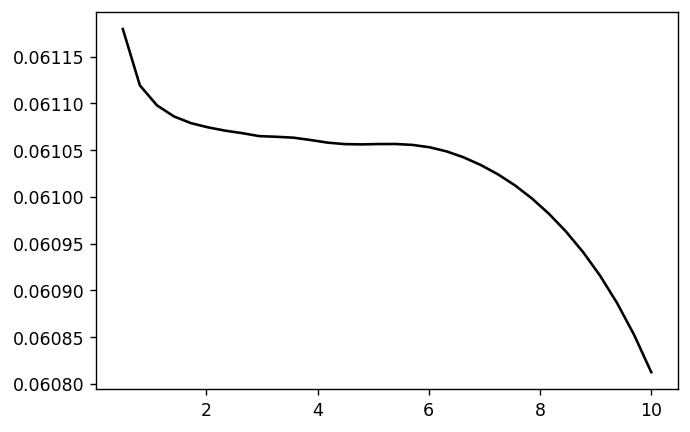

In [9]:
plt.plot(z0/mm,total_energy, 'k')